In [1]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('twitter.csv').iloc[:,1:]

print('–––––––––––––––––––––––––––––––––––––––')


print("Number of twitter accounts:   |",len(df))

print("Mean status count:            |", np.round(df.statuses_count.mean()))

print('–––––––––––––––––––––––––––––––––––––––')

df.head()

–––––––––––––––––––––––––––––––––––––––
Number of twitter accounts:   | 15374
Mean status count:            | 14170.0
–––––––––––––––––––––––––––––––––––––––


,screen_name,statuses_count
0,CriticSean,23681.0
1,DashDeCosta,22933.0
2,annaleahines,4748.0
3,cmpatco88,4565.0
4,mymuddylife,8857.0


# Let's plot the distribution of our statuses_count column

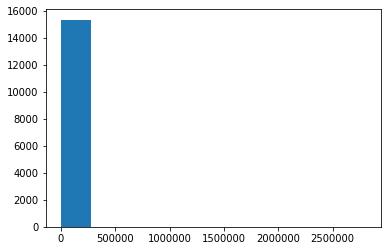

In [3]:
plt.hist(df.statuses_count);

### What can we say about this distribution?

Not symmetric


### Let's draw some samples from our statuses_count column, collect the means of each sample and plot a sampling distribution

In [4]:
.1*len(df)

1537.4

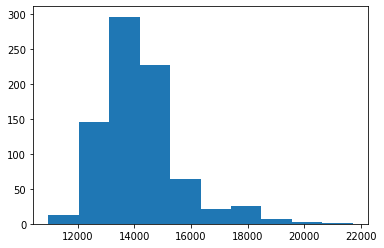

In [5]:
samples = np.asarray([np.random.choice(df.statuses_count, size = 800) for x in range(800)])
sample_means = [sample.mean() for sample in samples]
plt.hist(sample_means);

### What can we say about this distribution?

The distribution approximates a normal distribution, but there seem to be some very significant outliers.

Let's see if by removing outliers for our raw data, we can create a more normal distribution

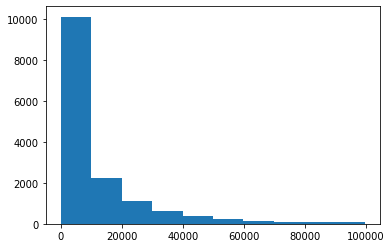

In [6]:
plt.hist(df[df.statuses_count < 100000].statuses_count);

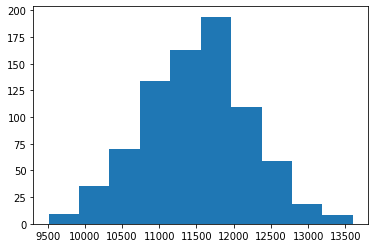

In [7]:
df = df[df.statuses_count < 100000]

sample = np.asarray([np.random.choice(df.statuses_count, size = 500).mean() for x in range(800)])

plt.hist(sample);

# Confidence Intervals

Confidence intervals = Sample mean +- margin of error

ie: The range from sample mean - margin of error to sample mean + margin of error

## Calculating margin of error when the population mean and std are known

#### Varience

<img src="https://images.deepai.org/glossary-terms/variance-6302132.jpg" alt="varience" width="400"/>

#### Standard Deviation

![std](https://www.standarddeviationcalculator.net/images/population-standard-deviation-formula.PNG)

>**Equation walkthrough:**
1. The difference between every datapoint and the mean is found
    - When datapoints are smaller than the mean, the difference results in a negative value. We want to add all of our differences, and if there are negative values the positive and negative differences will cancel each other out. We don't want that so we square the difference between a data point and the mean to make the positive.
2. We find the sum of all the differences
3. Divide the sum by the total number of data points
4. Lastly take the square root of the result to essentially undo the squaring of differences.

### Using the Z Critical Value

The Z critical value is used when the mean and standard deviation of our population is known.

![Margin of error](https://cdn.smassets.net/assets/cms/cc/uploads/mp-marginoferror-formula.png)

>**Equation Key**
    - σ = Standard Deviation
    - n = number of data points
    - z = z-critical threshold

>**Equation Walk Through**
    1. We divide the standard deviation of our sample by the square root of our sample size
    2. We then multiple by the z critical value
    
*Why Do We Divide by the Square Root of N?*

>The standard deviation divided by the square root of n is known as **Standard Error**.

>The Standard Error is the standard deviation of a sampling distribution.

>More Sample Size = Lower Standard Error = Lower Margin of Error

>Note in the graphic below that when N is small, the spread of the data is much wider and less normally distributed than the the spread of data when N is larger.

![sampling std](https://lh3.googleusercontent.com/proxy/EUm-S8cQAn7WVw4QdWwkLODM77MZopcu590zNf3WIDNFcMkN-z264b-xftdsanxbjkxN9LvNQW1LzAOCf4qyFJRdT1ZzQoCzAManrbrRQ0tcfQctIhsG6NoH86HSVfg-)

When the population mean and standard deviation are known, we use z critical values

>Z critical values can be calculated using scipy.stats.norm.ppf(q=CONFIDENCE PERCENTAGE)

In [8]:
z_critical_value = stats.norm.ppf(q=.975)
z_critical_value

1.959963984540054

Our Z critical score is 1.64. What does this mean?
>Answer here

If we know the mean, standard deviation, and z critical value. We can now calculate our margin of error.

In [9]:
mean = df.statuses_count.mean()
std = df.statuses_count.std()
n = len(df.statuses_count)
standard_error = std/np.sqrt(n)
margin_of_error = z_critical_value * standard_error
margin_of_error

261.4082827668757

In [10]:
confidence_interval = (mean-margin_of_error, mean+margin_of_error)
confidence_interval

(11225.076846116139, 11747.89341164989)

We can say with 95% confidence that the population mean falls between 11267 and 11705
Or put another way, if we were to draw 100 samples from our population, approximately 95 of the sample means would fall within our confidence interval.

# When do we know the mean of our population?

![never](never.png)

When we do not know the mean of our population, we use the t critical score instead of the z critical score.

The z and t scores revolve around the z and t distributions.

![z-t-distribution](https://andyjconnelly.files.wordpress.com/2017/05/distributions1.png)

T distributions have fatter tails than z distributions which makes it more difficult to make confident assertions.

This makes sense. If we are trying to make a claim about an entire population based on a smaller sample of that population, it should be more difficult to have high confidence in the results.

Calculating the standard deviation of a population sample is different than calculating the standard deviation for the population as a whole

![std-sample](https://usercontent2.hubstatic.com/6951521_f520.jpg)

To calculate the t critical value, we use scipy.stats.t.ppf(q=CONFIDENCE, df=NUMBER OF SAMPLES)

In [22]:
## We set the confidence level to .975 because we want our threshold on each
## Side of the distribution to total up to 5% of the data in our distribution
## If we set our confidence to .95 we will have five percent of data beyond our threshold
## On both sides of our distribution. This means our actual confidence threshold would be 90%
t_critical_value = stats.t.ppf(q=.975, df=799)
t_critical_value

1.9629374611056056

In [23]:
sample_n

800

**Calculate our margin of error**

In [24]:
sample_mean = sample.mean()
sample_std = sample.std(ddof=1)
sample_n = len(sample)
standard_error = sample_std/np.sqrt(sample_n)



sample_margin_of_error = t_critical_value * standard_error

sample_margin_of_error

48.923086039104156

In [25]:
sample_confidence_interval = (sample_mean-sample_margin_of_error, 
                       sample_mean+sample_margin_of_error)

In [26]:
confidence_interval_t = stats.t.interval(alpha = 0.975,              # Confidence level
                                         df= sample_n,                     # Degrees of freedom
                                         loc = sample_mean,                # Sample mean
                                         scale = standard_error)

In [27]:
sample_confidence_interval

(11462.475006460896, 11560.321178539103)

In [28]:
confidence_interval_t

(11455.42935208139, 11567.36683291861)

In [29]:
def conf_interval(sample):
    '''
    Input:  sample 
    Output: Confidence interval
    '''
    n = len(sample)
    x_hat = sample.mean()
    # Calculate the z-critical value using stats.norm.ppf()
    # Note that we use stats.t.ppf with q = 0.975 to get the desired t-critical value 
    # instead of q = 0.95 because the distribution has two tails.

    t = stats.t.ppf(q = 0.975, df=24)  #  t-critical value for 95% confidence
    
    sigma = sample.std()/math.sqrt(n) 

    # Calculate the margin of error using formula given above
    moe = t * sigma

    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    conf = (x_hat - moe, x_hat + moe)
    
    return conf

In [40]:
sample_size = 500

# Initialize lists to store interval and mean values
intervals = []
sample_means = []

# Run a for loop for sampling 25 times and calculate + store confidence interval and sample mean values in lists initialised above

for sample in range(25):
    # Take a random sample of chosen size 
    sample = np.random.choice(a= df.statuses_count, size = sample_size)
    
    # Calculate confidence_interval from function above
    confidence_interval = conf_interval(sample)    

    # Calculate the sample mean 
    sample_mean = sample.mean()
    
    # Calculate and append sample means and conf intervals for each iteration
    sample_means.append(sample_mean)
    intervals.append(confidence_interval)


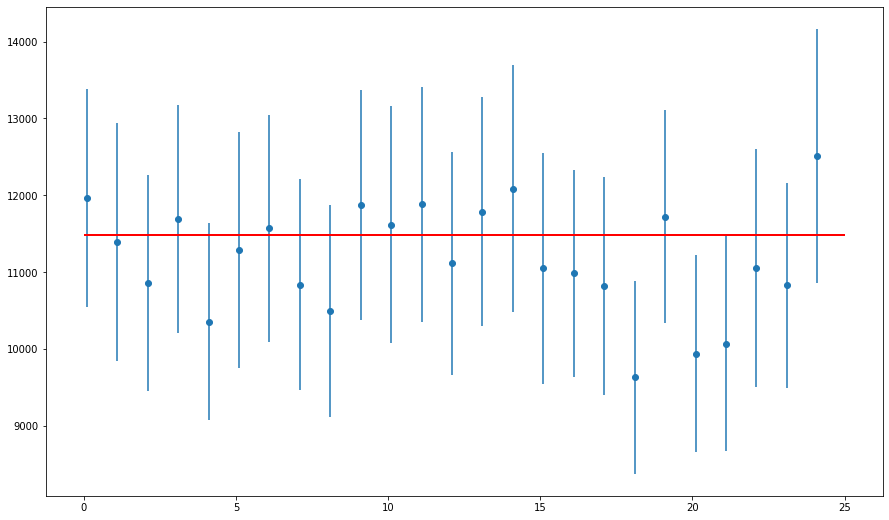

In [41]:
plt.figure(figsize=(15,9))

# Draw the mean and confidence interval for each sample
plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

# Draw the population mean 
plt.hlines(xmin=0, xmax=25,
           y=df.statuses_count.mean(), 
           linewidth=2.0,
           color="red")

In [42]:
count = 0
m = df.statuses_count.mean() 
for c1, c2 in intervals:
    if (m>c1) & (m<c2):
        count +=1
        
count/25

0.88